<a href="https://colab.research.google.com/github/remre/StriveSchool-ai/blob/main/m6CV/d9/sol/OpenCV_day9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


In [2]:
net = cv2.dnn.readNet('yolov3.weights','yolov3.cfg')

In [3]:
classes = []

In [4]:
with open('coco.names', 'r') as f:
  classes = [line.strip() for line in f.readlines()]
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [5]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]

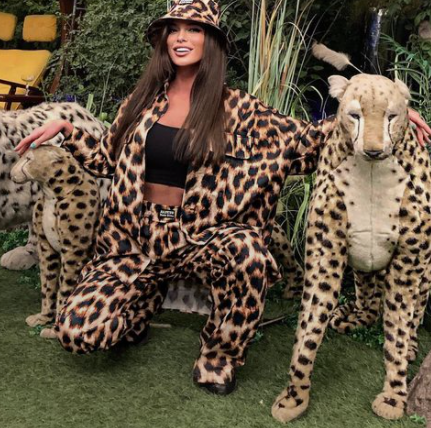

In [12]:
img = cv2.imread('cheetahgirls.png')

cv2_imshow(img)

In [13]:
height , width, channels = img.shape

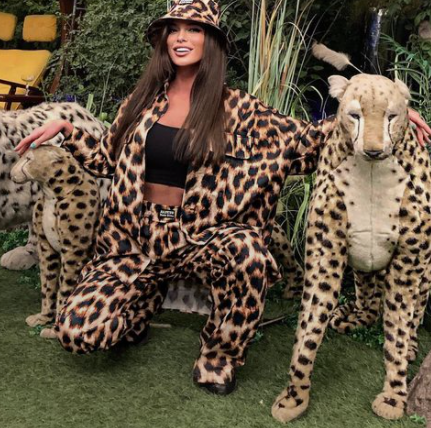

In [14]:
img1 = img.copy()
img1  = cv2.resize(img1, None, fx=1.1, fy = 0.9)
cv2_imshow(img)

In [15]:
#blob detecting objects
blob = cv2.dnn.blobFromImage(img1, 0.592, (416,416),(0,0,0), True, crop= False )#wsize 416 is standdart

In [ ]:
for b in blob:
  for n,  img_blob in enumerate(b):
    cv2_imshow(img_blob)


net.setInput(blob)

outs = net.forward(outputlayers) #info about objects detected in the image
#print(outs)



In [6]:
indir = cv2.imread('indir.jpg')
home1= indir.copy()

In [7]:
#blob detecting objects
blobb = cv2.dnn.blobFromImage(home1, 0.592, (416,416),(0,0,0), True, crop= False )#wsize 416 is standdart

In [8]:
heightt , widthh, channelss = indir.shape

In [ ]:
for b in blobb:
  for n,  img_blobb in enumerate(b):
    cv2_imshow(img_blobb)


net.setInput(blobb)

outss = net.forward(outputlayers) #info about objects detected in the image
#print(outs)

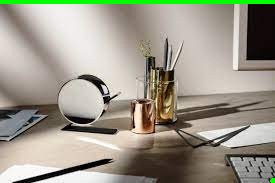

In [18]:
#show infos

for out in outss:
  for detection in out:
    scores = detection[5:]

    class_id = np.argmax(scores)
    confidence = scores[class_id]

    if confidence > 0.5:
      c_x = int(detection[0]*widthh)
      c_y = int(detection[1]*heightt)
      w = int(detection[2]*widthh)
      h = int(detection[3]*heightt)

      #cv2.circle(img1, (c_x,c_y), 10,(0,255,0),2)
      x = int(c_x-w / 2)
      y = int(c_y-h / 2)

      cv2.rectangle(indir1,(x,y),(x+w , y+h),(0,255,0),3)


cv2_imshow(indir1)

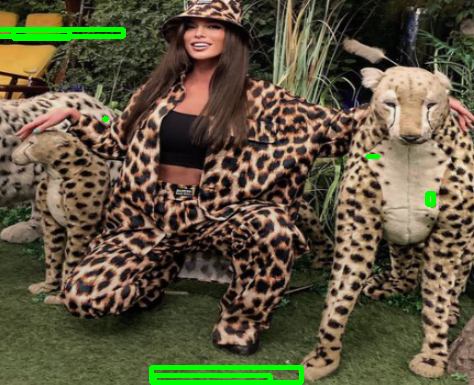

In [17]:
#show infos

for out in outs:
  for detection in out:
    scores = detection[5:]

    class_id = np.argmax(scores)
    confidence = scores[class_id]

    if confidence > 0.5:
      c_x = int(detection[0]*width)
      c_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      #cv2.circle(img1, (c_x,c_y), 10,(0,255,0),2)
      x = int(c_x-w / 2)
      y = int(c_y-h / 2)

      cv2.rectangle(img1,(x,y),(x+w , y+h),(0,255,0),3)


cv2_imshow(img1)

In [15]:
home = cv2.imread('home.jpg')
home1 = home.copy()

In [7]:
#blob detecting objects
blobb = cv2.dnn.blobFromImage(home1, 0.592, (416,416),(0,0,0), True, crop= False )#wsize 416 is standdart

In [8]:
heightt , widthh, channelss = home.shape

In [ ]:
'''for b in blobb:
  for n,  img_blobb in enumerate(b):
    cv2_imshow(img_blobb)'''


net.setInput(blobb)

outss = net.forward(outputlayers) #info about objects detected in the image
#print(outs)


3
frisbee
frisbee
diningtable


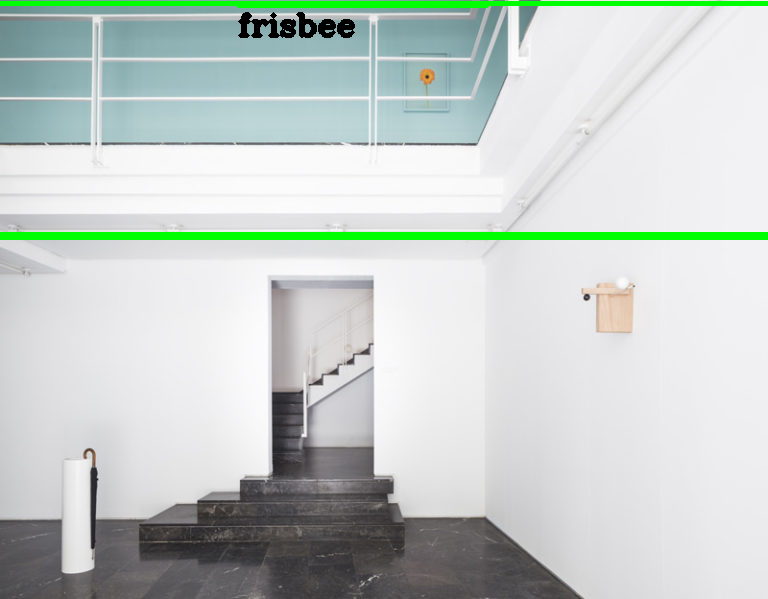

In [32]:
#show infos
boxes = []
font = cv2.FONT_HERSHEY_COMPLEX
confidences = []
class_ids = []

for out in outss:
  home1 = home.copy()
  for detection in out:
    scores = detection[5:]

    class_id = np.argmax(scores)
    confidence = scores[class_id]

    if confidence > 0.5:
      c_x = int(detection[0]*widthh)
      c_y = int(detection[1]*heightt)
      w = int(detection[2]*widthh)
      h = int(detection[3]*heightt)

      #cv2.circle(home1, (c_x,c_y), 10,(0,255,0),2)
      x = int((c_x-w )/ 2)
      y = int((c_y-h) / 2)

      #cv2.rectangle(home1,(x,y),(x-w , y-h),(0,255,0),3)
      boxes.append([x,y,w,h],)
      confidences.append(float(confidence))

      class_ids.append(class_id)
print(len(boxes))
objects_detected = len(boxes)

for i in range(objects_detected):
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])

  cv2.rectangle(home1,(x,y),(x+w , y+h),(0,255,0),3)
  cv2.putText(home1,label, (x, y+30),font, 1,(0,0,0),3,)

  print(label)
cv2_imshow(home1)

In [ ]:
#background substractor
background_subtractor = cv2.createBackgroundSubtractorMOG2()#at least try to give a history but all of them are optional, threshold is 

cap = cv2.VideoCapture(0)

k = 0

while True:

  ret,frame = cap.read()

  if not ret:

    break
  foreground_mask = background_subtractor.apply(apply)

  cv2.imshow('Frame',frame)
  cv2.imshow('Mask',foreground_mask)

  k = cv2.waitKey(30)
  if k == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

In [ ]:
git clone https://github.com/pjreddie/darknet
cd darknet
make

wget https://pjreddie.com/media/files/yolov3.weights

./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
#https://github.com/spmallick/learnopencv/blob/master/ObjectDetection-YOLO/object_detection_yolo.py